## A.	Explain the main assumptions of Linear Regression in detail.

1. The relationship between independent variables and dependent variable is assumed to be linear.
2. Independent variables shouldn't be higly corelated.(multicolliearity between the Independent variables should be very less)
3. The variance of residuals i.e. error terms should be constant for all the independent variables or we can say the spread of residuals between the independent variables are consistent.(homoscedasticity)
4. The residuals or error should follow bell-shaped curve.

## B.	What is the difference between R-squared and Adjusted R-squared?

R-squared measures the portion of variance between the dependent variables explained by the independent variablesin a regression model.
where Adjusted R-squared is the modified version of R-squared which penalizes the inclusion of unnecessary independent variables in the model.
We can say Adjusted R-squared considers and tests different independent variables against the model and R-squared does not.

## C.	What are the different types of Regularization techniques in Regression. Explain in detail with cost functions of each technique.

There are 3 types of Regularization techniques
1.L1-Regularization or Lasso Regression
2.L2-Regularization or Ridge Regression
3.ElasticNet

1.L1-Regularization or Lasso Regression:
A penality term is added to the std.least square error(MSE) cost function to penalizes the independent variables.

Cost = Original_Cost + lambda * Σ|w_i| 
lambda is a hyperparameter controlling the strength of the penalty.
w_i are the regression coefficients.
* L1 regularization encourages sparsity in the model, driving some coefficients to exactly zero, effectively performing feature selection

2.L2-Regularization or Ridge Regression:
A penality term is added to the std.least square error(MSE) cost function to penalizes the independent variables.

Cost = Original_Cost + lambda * Σw_i^2 
lambda is a hyperparameter controlling the strength of the penalty.
w_i are the regression coefficients.

*L2 regularization shrinks the coefficients towards zero but generally doesn't force them to exactly zero, helping to mitigate multicollinearity and improve model stability. 

3.ElasticNet:
Elastic Net combines both L1 and L2 regularization penalties. 
Cost = Original_Cost + lambda1 * Σ|w_i| + lambda2 * Σw_i^2 
lambda1 and lambda2 are hyperparameters controlling the strength of L1 and L2 penalties, respectively. 

* Elastic Net provides a balance between L1's feature selection and L2's coefficient shrinkage. It's useful when features are correlated and you want to perform feature selection while also shrinking coefficients.

* Regularization techniques add a penalty to the cost function to discourage complex models and improve generalization by reducing variance. L1 (Lasso) encourages sparsity and feature selection, while L2 (Ridge) shrinks coefficients without forcing them to zero. Elastic Net combines both for a balance between feature selection and shrinkage. 


## D.	How logistic regression works for multiclass classification. Explain in detail.

Logistic Regression is traditionally a binary classification algorithm, but it can be extended to handle multiclass classification problems 
using strategies like One-vs-Rest (OvR) or Multinomial Logistic Regression (Softmax Regression)

One-vs-Rest (OvR):
In OvR, you treat each class as the positive class and all other classes as the negative class.
This creates a separate binary logistic regression model for each class. Each model predicts the probability of an instance belonging to a specific class, select the class with the highest predicted probability.

Multinomial Logistic Regression (Softmax Regression):
Instead of using the sigmoid function for binary classification, multi-class logistic regression employs the softmax function.
The softmax function normalizes the output of the logistic regression model into a probability distribution over the classes. 
The output vector will contain probabilities for each class, summing to 1, allowing for a probabilistic interpretation of the prediction. 

## E.	Explain the performance metrics of logistic regression.

Accuracy:
This metric represents the overall correctness of the model's predictions, calculated as (TP + TN) / (TP + TN + FP + FN), where TP = True Positives, 
TN = True Negatives, FP = False Positives, and FN = False Negatives. 

Precision:
Measures the model's ability to correctly identify positive cases, calculated as TP / (TP + FP). It indicates the percentage of predicted positive cases that were actually positive. 

Recall (Sensitivity):
Measures the model's ability to capture all positive cases, calculated as TP / (TP + FN). It indicates the percentage of actual positive cases that were correctly identified by the model. 

F1-score:
A metric that balances precision and recall, calculated as 2 * (Precision * Recall) / (Precision + Recall). It is particularly useful when dealing with imbalanced datasets. 

AUC-ROC:
The Area Under the Receiver Operating Characteristic curve is a measure of the model's ability to discriminate between positive and negative classes across different threshold settings. A higher AUC-ROC value indicates a better-performing mode

## F. Mobile Price prediction

<div style="background-color:#1e3a8a; color: white; padding: 10px; border-radius: 8px; font-size: 20px;font-weight: bold;">
  📚 <span style="color: #fbbf24;">1</span>| Importing the Libraries
</div>

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import math
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

<div style="background-color:#1e3a8a; color: white; padding: 10px; border-radius: 8px; font-size: 20px;font-weight: bold;">
  🧾 <span style="color: #fbbf24;">2</span>| Import & Read the Dataset
</div>

In [36]:
cellphone_data = pd.read_csv(r"C:\Users\Dell\Data_Science\Data\Cellphone.csv")

In [37]:
cellphone_data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


<div style="background-color:#1e3a8a; color: white; padding: 10px; border-radius: 8px; font-size: 20px;font-weight: bold;">
  🔎 <span style="color: #fbbf24;">3</span>| EDA
</div>

In [39]:
# Finding Null values column wise
cellphone_data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [40]:
# Finding if any rows having missing values
cellphone_data[cellphone_data.isnull().any(axis=1)]


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


In [41]:
# Finding duplicate values
cellphone_data.duplicated().sum()

0

In [42]:
cellphone_data['Product_id'][cellphone_data['Product_id'].duplicated()].unique()

array([ 880,  947,   99, 1103, 1120,  774,  289, 1058,  605,  315,  776,
        187,  990, 1020,  104,  860,  662,  907, 1339, 1145,  162,  974,
        575, 1248,   93,  739,  804,   43,  738,  563,  577,  218,  198,
         56,   14,  937, 1221, 1011,   66, 1026, 1216,  763,  237,  131,
       1062, 1143,  841,  183, 1080,  827,  133,  832,   30,   64,  637,
        143,  460,  798, 1327,  409, 1198, 1112, 1089,  696,  497,  301,
        857,  377,  701, 1161,   32, 1137,  826,  851,  290, 1206, 1296,
       1131], dtype=int64)

In [43]:
# Finding any records are missing
cellphone_data.isnull().values.any()


False

In [44]:
# Finding information from the data frame
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [45]:
cellphone_data.columns = cellphone_data.columns.str.strip()
cellphone_data.rename(columns={'Product_id':'product_id','Price': 'price', 'Sale':'sale','resoloution':'resolution','RearCam':'rear_cam','Front_Cam':'front_cam','cpu core':'cpu_core','cpu freq':'cpu_freq','internal mem':'internal_mem'}, inplace=True)
cellphone_data.head(2)

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.0,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.0,3.15,0.0,1700,9.9


In [46]:
# Finding no.of rows and columns
cellphone_data.shape

(161, 14)

In [47]:
# Removing product Id column
cellphone_data.drop(columns=['product_id'], axis=1, inplace=True)
print(cellphone_data.columns)


Index(['price', 'sale', 'weight', 'resolution', 'ppi', 'cpu_core', 'cpu_freq',
       'internal_mem', 'ram', 'rear_cam', 'front_cam', 'battery', 'thickness'],
      dtype='object')


In [48]:
cellphone_data.describe()

,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


# Univariate Analysis

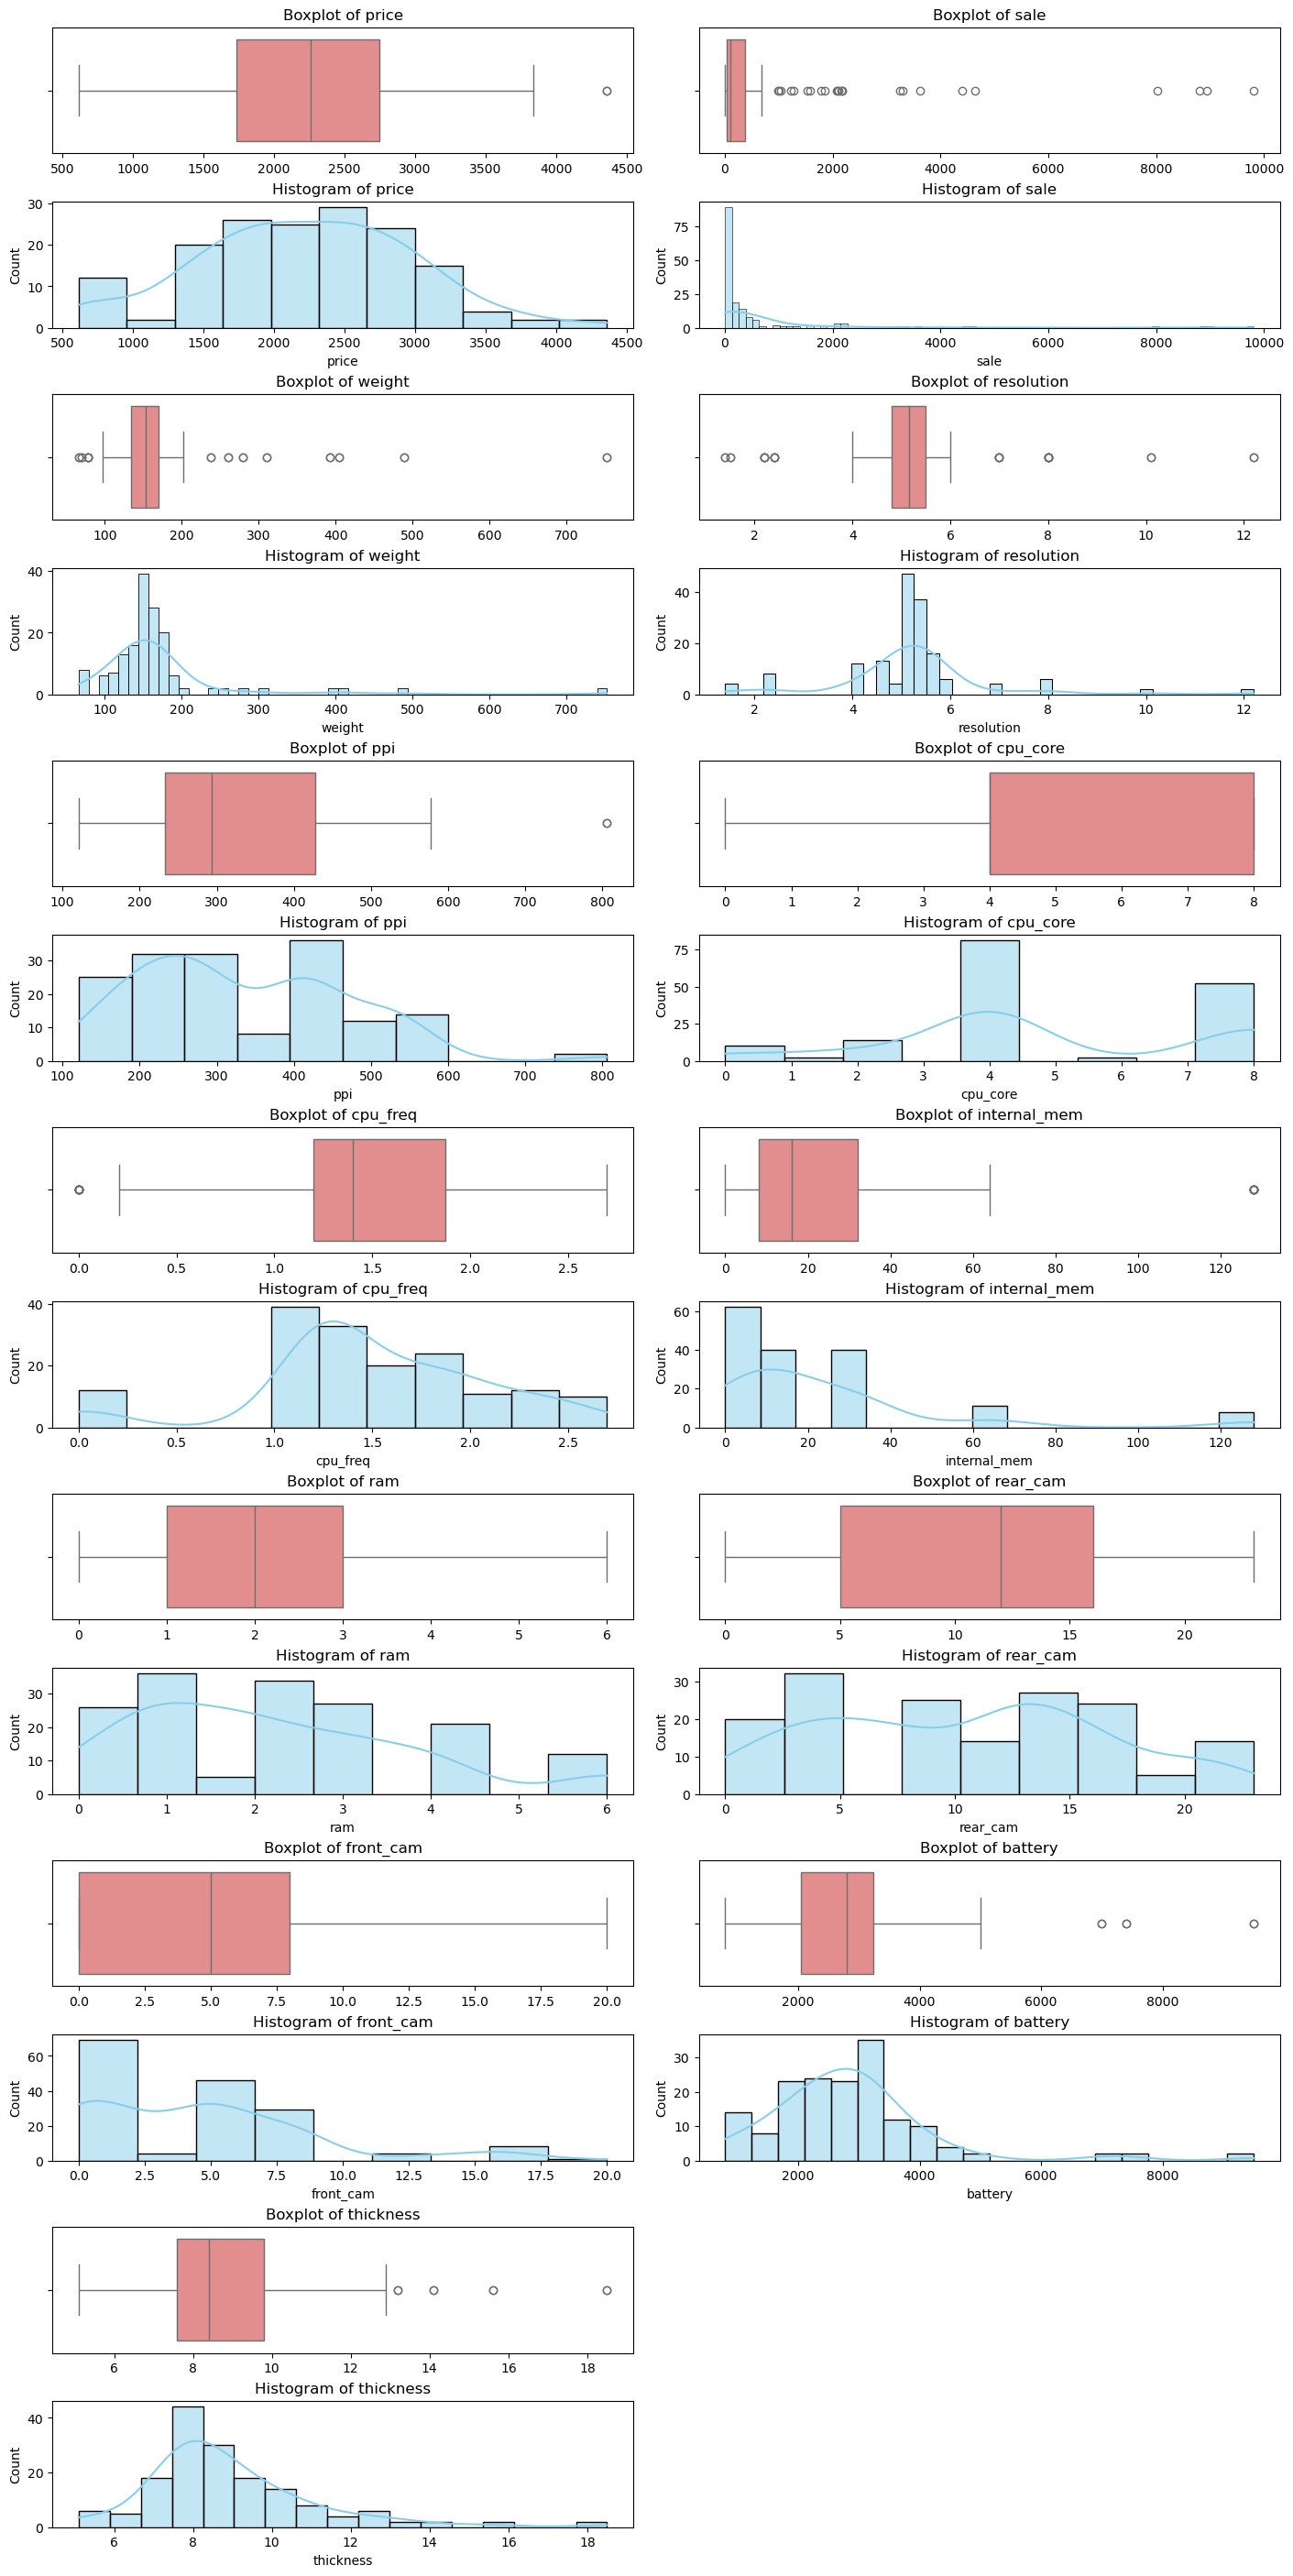

In [50]:

def plot_box_and_hist(dataframe, n_cols=2, figsize_base=(14, 4)):
    """
    Generates boxplots and histograms for all numeric columns in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        n_cols (int, optional): Number of columns in the subplot grid. Defaults to 2.
        figsize_base (tuple, optional): Base figure size (width, height).
            The height of the figure will be scaled based on the number of rows.
            Defaults to (14, 4).
    """
    numeric_columns = dataframe.select_dtypes(include='number').columns
    n_vars = len(numeric_columns)
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows * 2, n_cols, figsize=(figsize_base[0], n_rows * figsize_base[1]), constrained_layout=True)

    for idx, col in enumerate(numeric_columns):
        row = (idx // n_cols) * 2
        col_pos = idx % n_cols

        sns.boxplot(x=dataframe[col], ax=axs[row][col_pos], color='lightcoral')
        axs[row][col_pos].set_title(f'Boxplot of {col}')
        axs[row][col_pos].set_xlabel('')

        sns.histplot(dataframe[col], kde=True, ax=axs[row + 1][col_pos], color='skyblue')
        axs[row + 1][col_pos].set_title(f'Histogram of {col}')
        axs[row + 1][col_pos].set_xlabel(col)

    # Hide any unused subplots
    total_plots = n_rows * n_cols
    for i in range(n_vars, total_plots):
        axs[(i // n_cols) * 2][i % n_cols].axis('off')
        axs[(i // n_cols) * 2 + 1][i % n_cols].axis('off')

    plt.show()


plot_box_and_hist(cellphone_data)

In [51]:
cellphone_data.skew()

price           0.052347
sale            4.269384
weight          3.981756
resolution      1.176110
ppi             0.602503
cpu_core       -0.009077
cpu_freq       -0.512663
internal_mem    2.389683
ram             0.792698
rear_cam        0.106929
front_cam       1.169750
battery         2.092660
thickness       1.587680
dtype: float64

## Bivariate Analysis

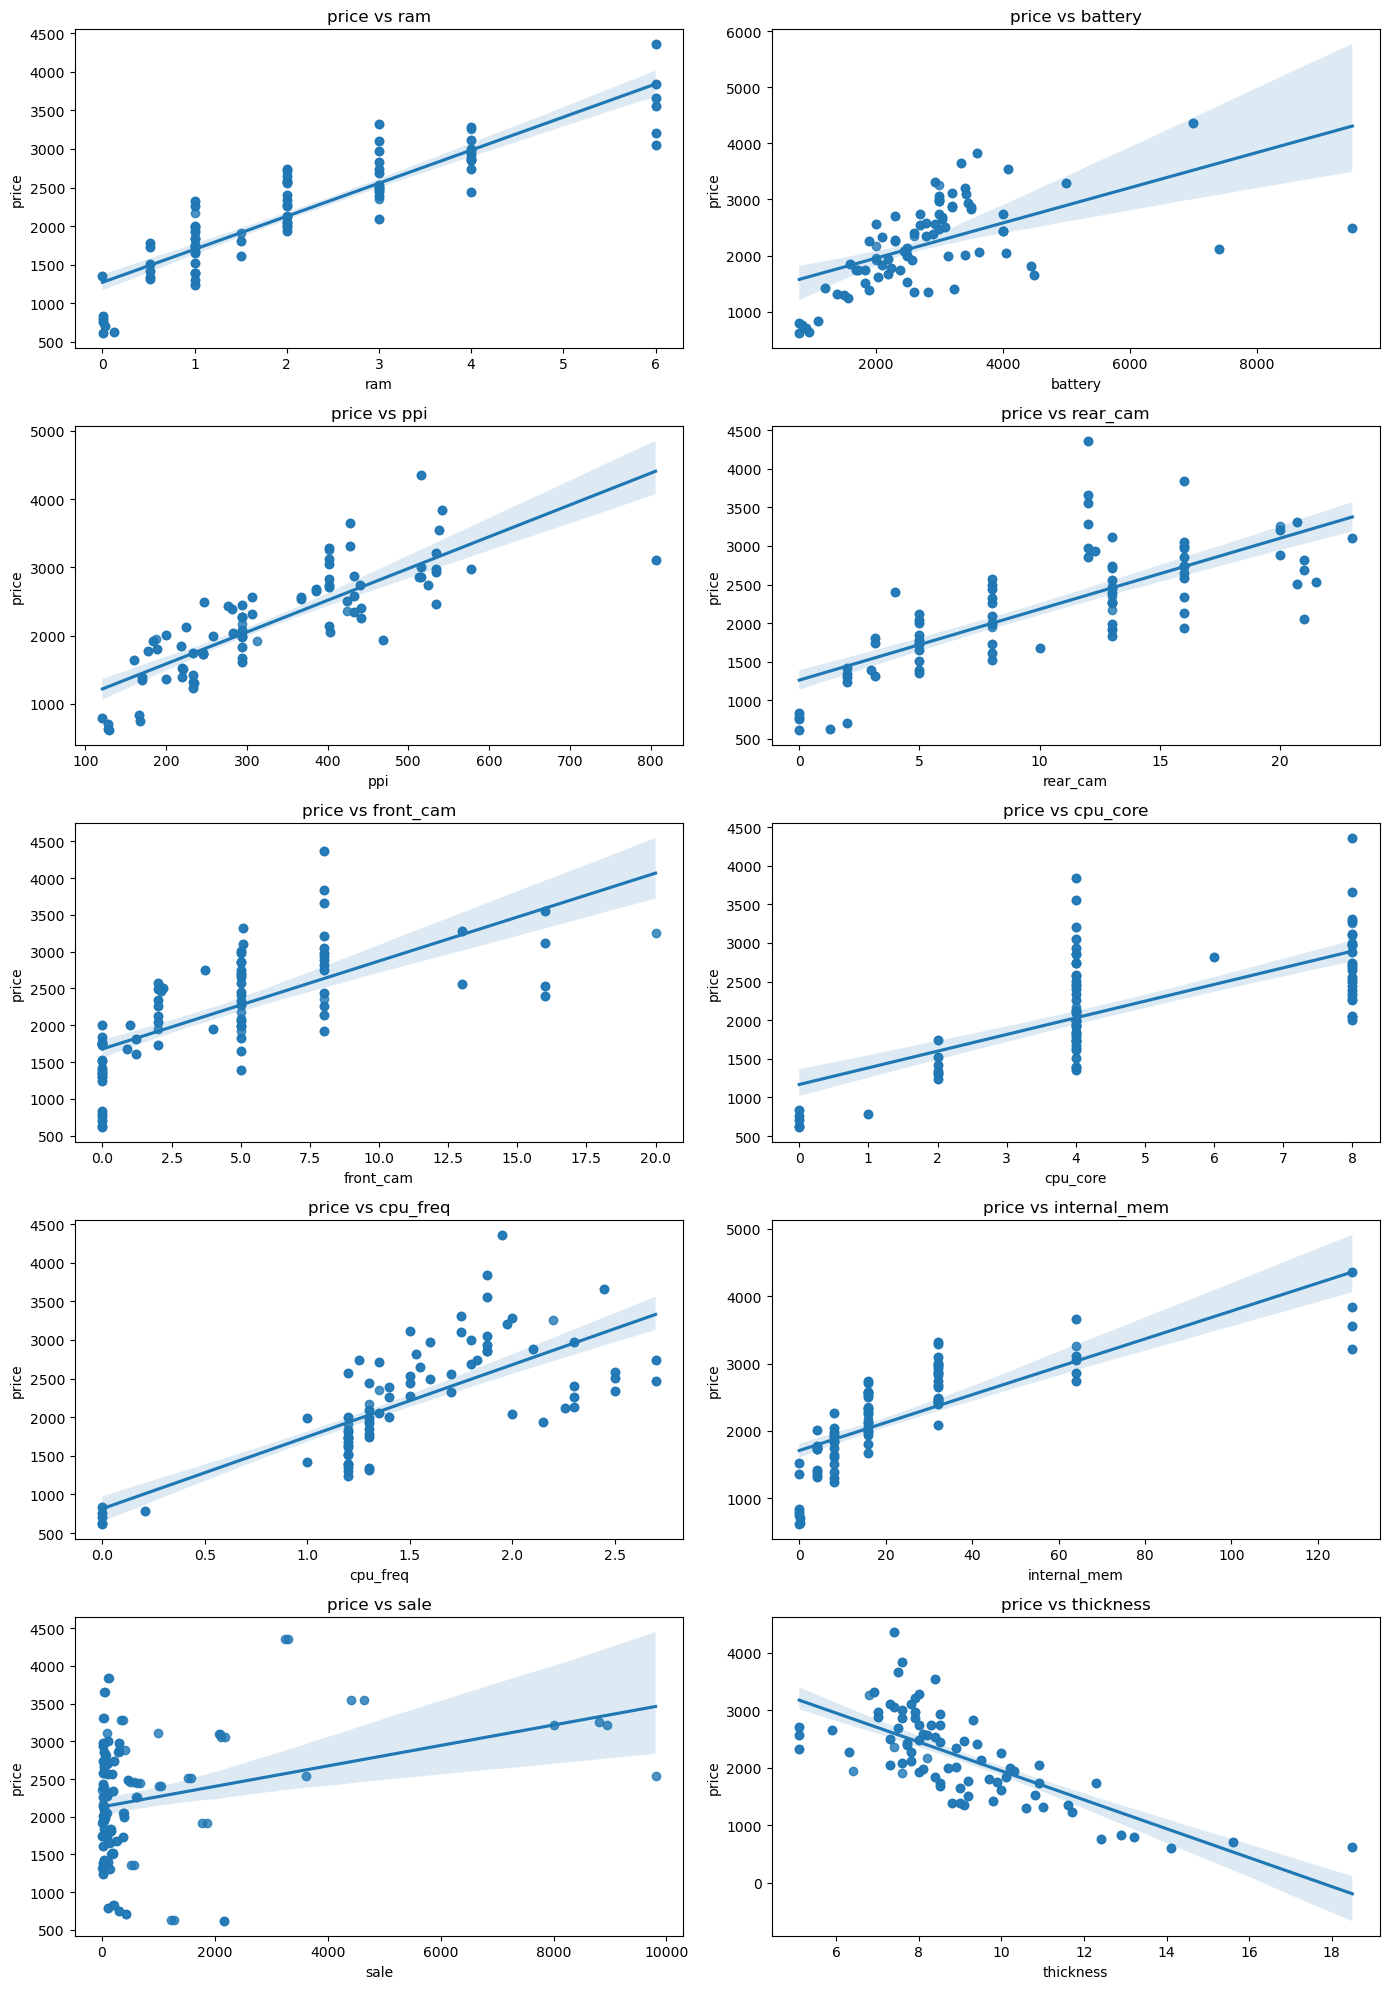

In [53]:


def plot_scatter_with_regression(dataframe, target_variable, features, n_cols=2, figsize_base=(14, 4)):
    """
    Plots scatter plots with regression lines for a list of features against a target variable.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        target_variable (str): The name of the target variable (y-axis).
        features (list): A list of feature names (x-axis) to plot against the target variable.
        n_cols (int, optional): The number of columns in the subplot grid. Defaults to 2.
        figsize_base (tuple, optional): The base figure size. The height will be scaled
                                       by the number of rows. Defaults to (14, 4).
    """
    n_rows = math.ceil(len(features) / n_cols)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(figsize_base[0], figsize_base[1] * n_rows))
    axs = axs.flatten()

    for i, feature in enumerate(features):
        sns.regplot(x=dataframe[feature], y=dataframe[target_variable], ax=axs[i])
        axs[i].set_title(f'{target_variable} vs {feature}')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel(target_variable)

    # Hide extra subplots if needed
    for j in range(len(features), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

#  usage with your cellphone_data:
target_var = 'price'
features = ['ram', 'battery', 'ppi', 'rear_cam', 'front_cam', 'cpu_core', 'cpu_freq', 'internal_mem', 'sale', 'thickness']

plot_scatter_with_regression(cellphone_data, target_var, features)

## Multivariate Analysis

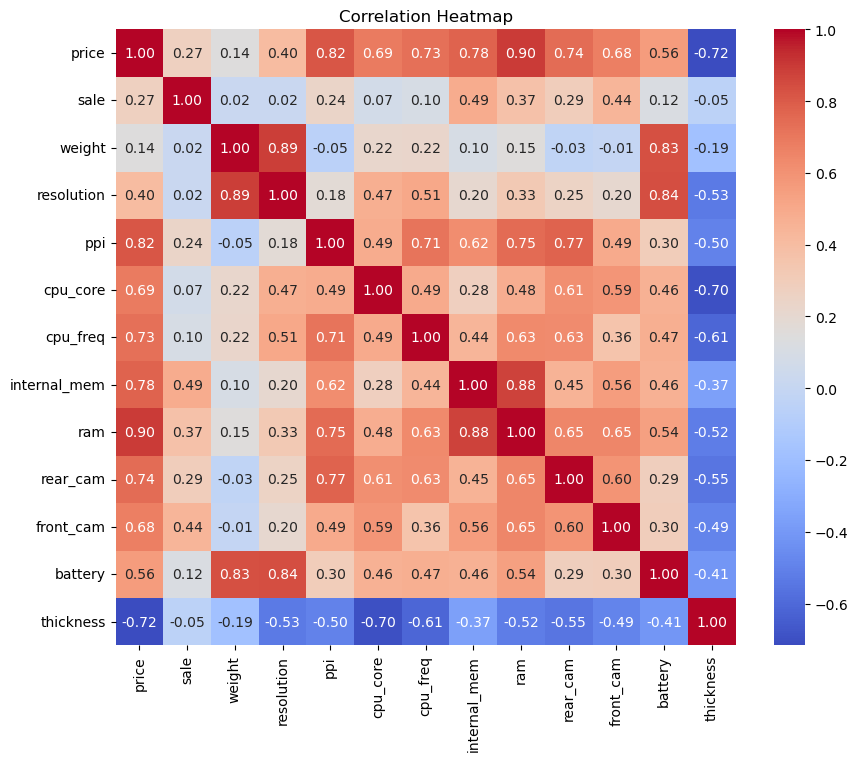

In [55]:
corr = cellphone_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


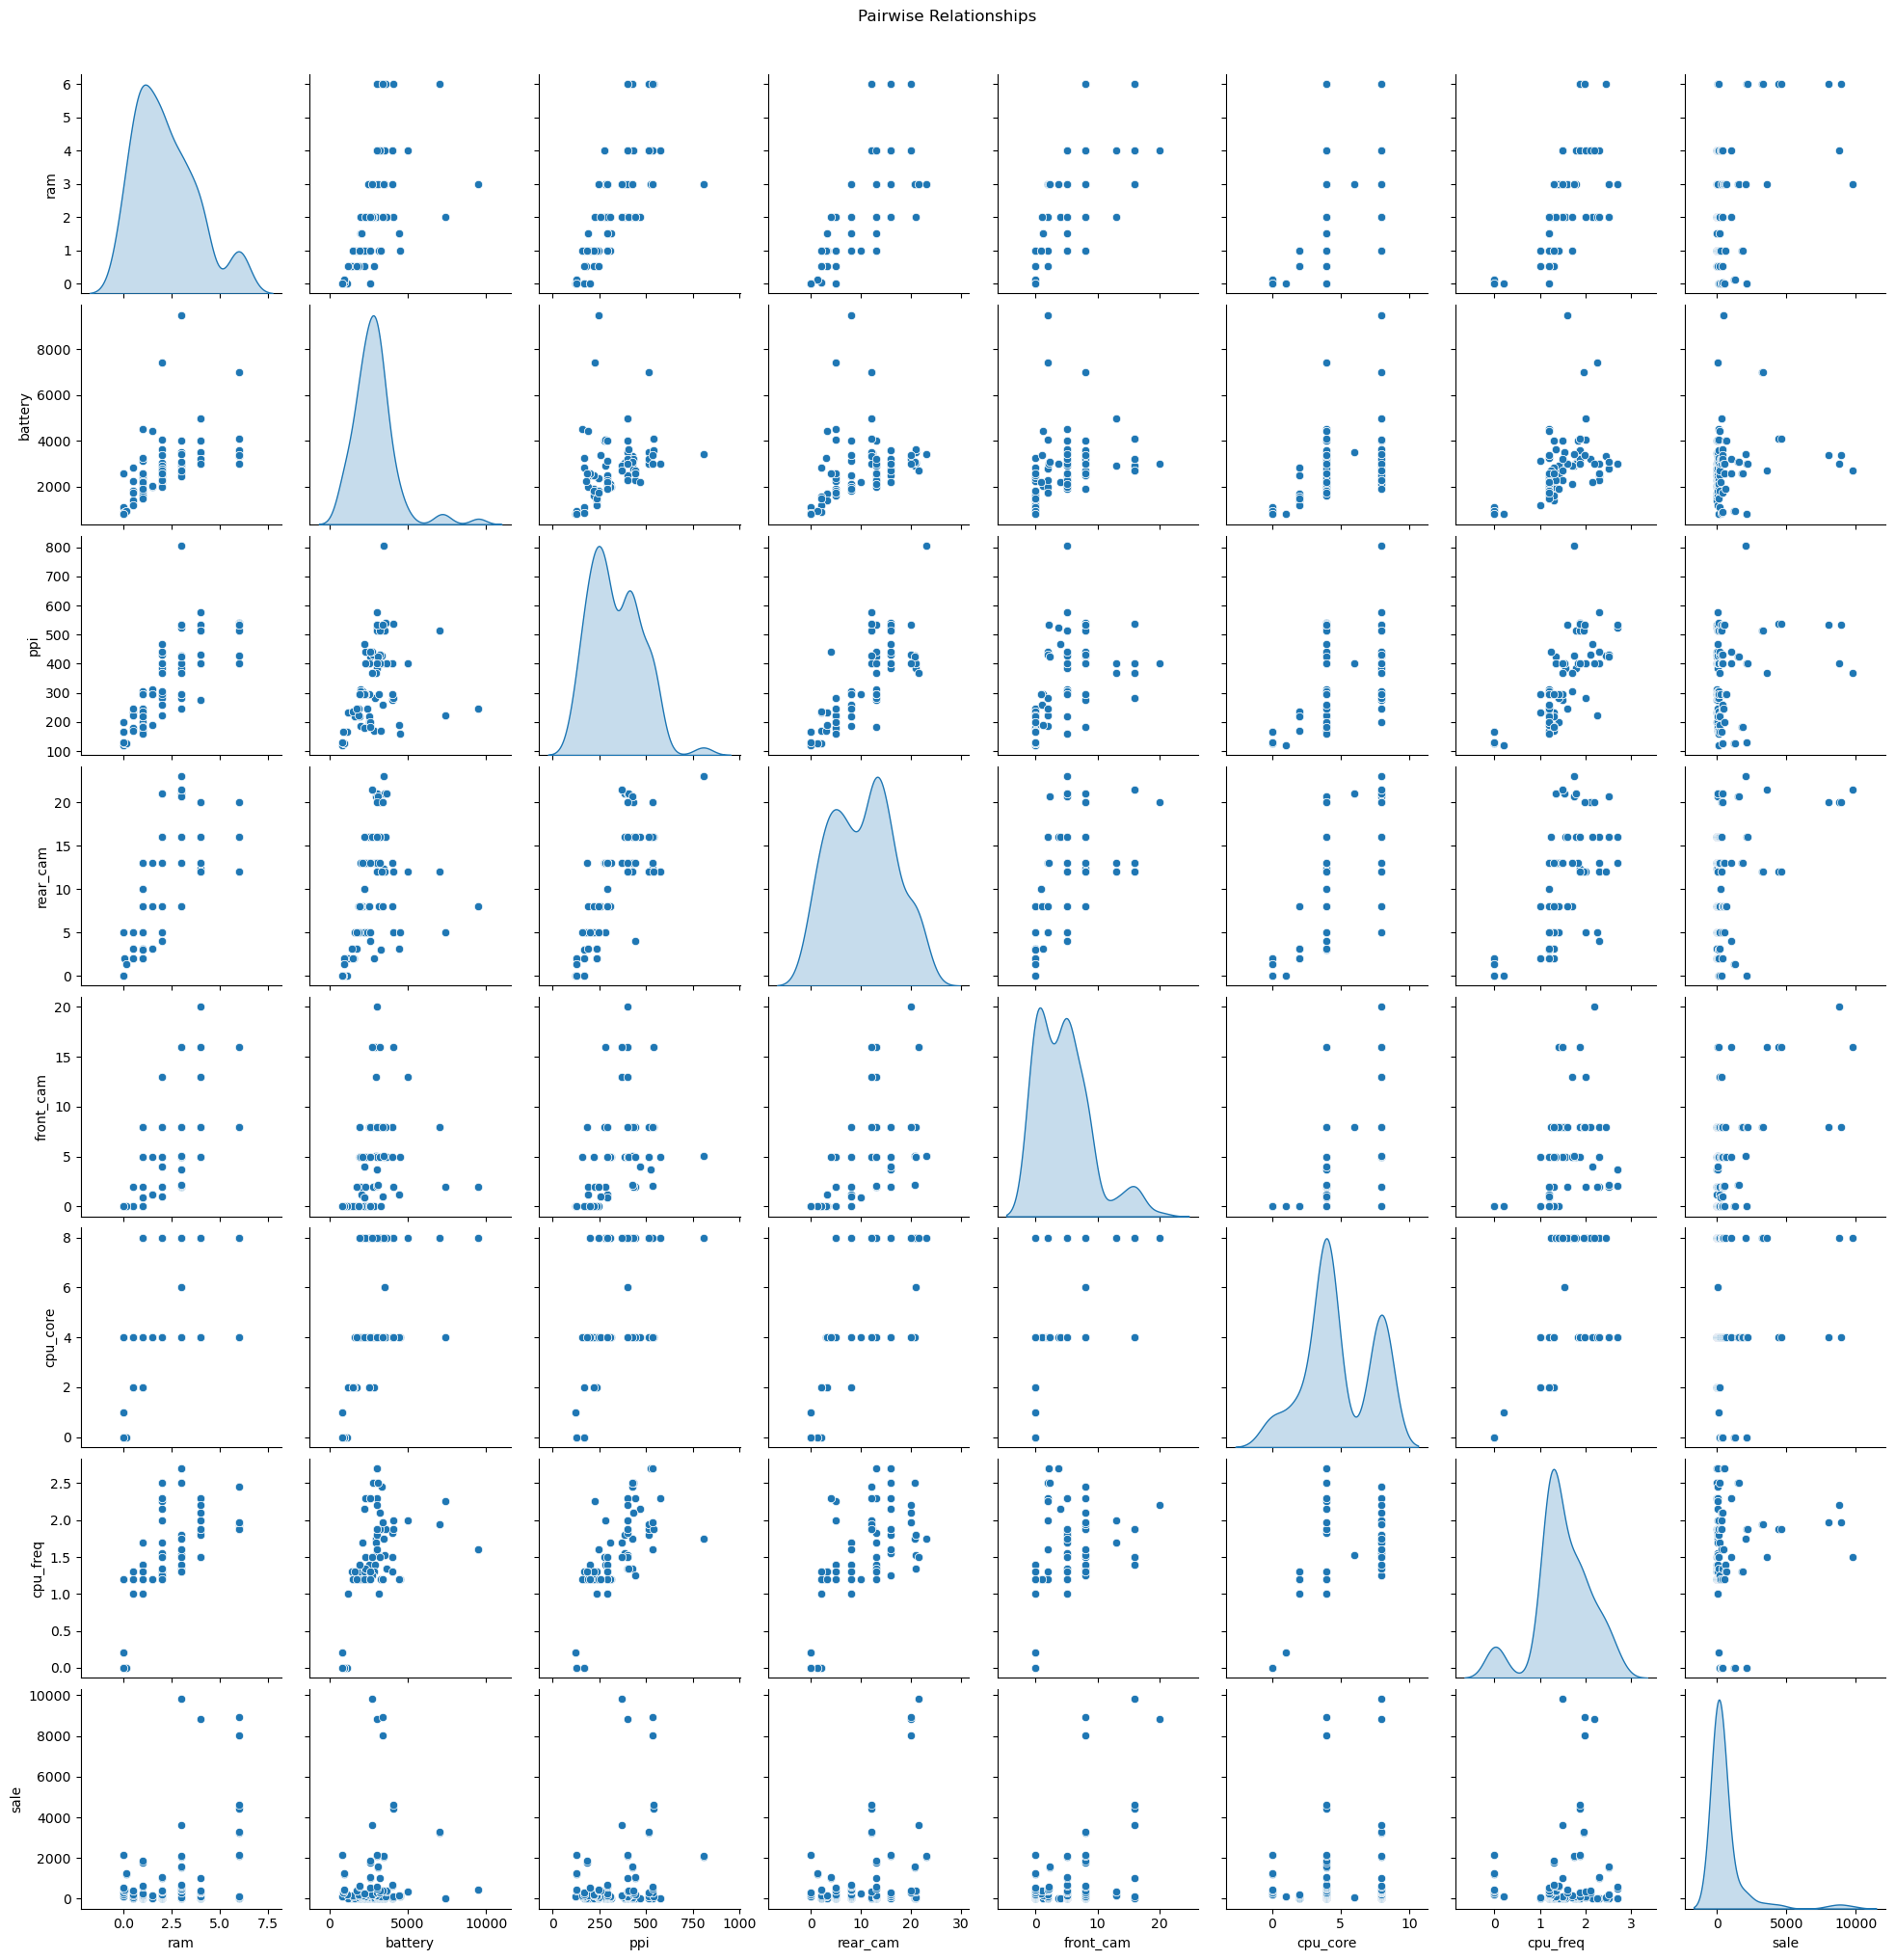

In [56]:
sns.pairplot(cellphone_data[['ram', 'battery', 'ppi', 'rear_cam','front_cam','cpu_core', 'cpu_freq', 'sale']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


<div style="background-color:#1e3a8a; color: white; padding: 10px; border-radius: 8px; font-size: 20px;font-weight: bold;">
  🚨 <span style="color: #fbbf24;">3</span>| Outliers Treatment
</div>

In [127]:
def handle_outliers(df, column):
    """
    Handles outliers in a specified column of the DataFrame using the IQR method.
    Outliers are replaced with the median value of the column.

    Parameters:
    - df: pandas DataFrame
    - column: string, name of the column to process

    Returns:
    - Modified DataFrame with outliers handled
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Replace outliers with the median
    median_value = df[column].median()
    df.loc[outliers, column] = median_value

    return df


In [59]:
outlier_treated_columns = ['price', 'sale', 'weight', 'resolution','battery','thickness']

for col in outlier_treated_columns:
    cellphone_data = handle_outliers(cellphone_data, col)
    
    
cellphone_data

,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,106,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,106,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,106,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,106,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


<div style="background-color:#1e3a8a; color: white; padding: 10px; border-radius: 8px; font-size: 20px;font-weight: bold;">
  🛠️ <span style="color: #fbbf24;">3</span>| Handling Skewness
</div>

In [61]:
def check_skewness(df):
  
    skew_data = []

    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        skew_val = df[col].skew()
        if abs(skew_val) > 1:
            level = 'Highly skewed'
        elif abs(skew_val) > 0.5:
            level = 'Moderately skewed'
        else:
            level = 'Low skewness'
        skew_data.append({'Column': col, 'Skewness': round(skew_val, 3), 'Skewness Level': level})

    skew_df = pd.DataFrame(skew_data).sort_values(by='Skewness', key=lambda x: abs(x), ascending=False)
    #print(skew_df)
    return skew_df


In [62]:
check_skewness(cellphone_data)

,Column,Skewness,Skewness Level
7,internal_mem,2.390,Highly skewed
1,sale,1.684,Highly skewed
10,front_cam,1.170,Highly skewed
3,resolution,-0.801,Moderately skewed
8,ram,0.793,Moderately skewed
4,ppi,0.603,Moderately skewed
6,cpu_freq,-0.513,Moderately skewed
12,thickness,0.443,Low skewness
2,weight,-0.432,Low skewness
0,price,-0.152,Low skewness


In [63]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

def compare_skewness_transformations(df, skip_cols=None):
    """
    Applies sqrt, cbrt, log, and boxcox transformations to numeric columns,
    compares skewness values, and returns a summary of the best transformation.

    Parameters:
    - df: pandas DataFrame
    - skip_cols: list of column names to skip (optional)

    Returns:
    - result_df: DataFrame showing skewness values and best transformation
    """
    if skip_cols is None:
        skip_cols = []

    numeric_cols = df.select_dtypes(include='number').columns
    results = []

    for col in numeric_cols:
        if col in skip_cols:
            continue  # Skip user-specified columns

        original = df[col].dropna()
        skew_results = {}
        min_val = original.min()
        offset = 1 - min_val if min_val <= 0 else 0
        adjusted = original + offset

        try:
            skew_results['sqrt'] = np.sqrt(adjusted).skew()
        except:
            skew_results['sqrt'] = np.nan

        try:
            skew_results['cbrt'] = np.cbrt(original).skew()
        except:
            skew_results['cbrt'] = np.nan

        try:
            skew_results['log'] = np.log(adjusted).skew()
        except:
            skew_results['log'] = np.nan

        try:
            boxcox_transformed, _ = boxcox(adjusted)
            skew_results['boxcox'] = pd.Series(boxcox_transformed).skew()
        except:
            skew_results['boxcox'] = np.nan

        best_transform = min(skew_results, key=lambda k: abs(skew_results[k]) if pd.notnull(skew_results[k]) else np.inf)

        results.append({
            'Column': col,
            'Skew (Original)': round(original.skew(), 3),
            'Skew (sqrt)': round(skew_results['sqrt'], 3),
            'Skew (cbrt)': round(skew_results['cbrt'], 3),
            'Skew (log)': round(skew_results['log'], 3),
            'Skew (boxcox)': round(skew_results['boxcox'], 3),
            'Best Transformation': best_transform
        })

    result_df = pd.DataFrame(results)
    return result_df


In [64]:
skewness_table = compare_skewness_transformations(cellphone_data,skip_cols=['weight','thickness','price','rear_cam','battery','cpu_core'])
skewness_table

,Column,Skew (Original),Skew (sqrt),Skew (cbrt),Skew (log),Skew (boxcox),Best Transformation
0,sale,1.684,0.891,0.584,-0.058,-0.008,boxcox
1,resolution,-0.801,-0.945,-0.993,-1.088,-0.018,boxcox
2,ppi,0.603,0.153,0.014,-0.258,-0.028,cbrt
3,cpu_freq,-0.513,-1.074,-2.809,-1.650,0.014,boxcox
4,internal_mem,2.390,1.056,-0.154,-0.622,-0.008,boxcox
5,ram,0.793,0.304,-0.922,-0.210,-0.022,boxcox
6,front_cam,1.170,0.319,-0.576,-0.317,-0.077,boxcox


In [65]:
def apply_best_transformations(df, transform_info):
    df_transformed = df.copy()

    for _, row in transform_info.iterrows():
        col = row['Column']
        method = row['Best Transformation']
        original = df_transformed[col]

        # Ensure numeric type is float before transformation
        df_transformed[col] = df_transformed[col].astype(float)

        # Offset for positive-only transforms
        offset = abs(original.min()) + 1 if original.min() <= 0 else 0
        data_pos = original + offset

        try:
            if method == 'sqrt':
                df_transformed[col] = np.sqrt(data_pos)
            elif method == 'log':
                df_transformed[col] = np.log(data_pos)
            elif method == 'cbrt':
                df_transformed[col] = np.cbrt(original)
            elif method == 'boxcox':
                # Apply boxcox only to non-null values
                non_null_index = data_pos.dropna().index
                boxcox_data, _ = boxcox(data_pos.loc[non_null_index])
                df_transformed.loc[non_null_index, col] = boxcox_data
        except Exception as e:
            print(f" Could not apply {method} transformation to {col}: {e}")

    return df_transformed


In [66]:
# Apply transformations
transformed_cellphone_df = apply_best_transformations(cellphone_data, skewness_table)
transformed_cellphone_df.head()

,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,2357,2.373085,135.0,137.402398,7.512572,8,1.766973,3.698894,1.575662,13.00,2.809969,2610,7.4
1,1749,2.373085,125.0,50.582796,6.153449,2,1.688426,1.867646,0.738490,3.15,0.000000,1700,9.9
2,1916,2.373085,110.0,93.524315,6.782423,4,1.534070,2.696836,0.996628,13.00,2.186685,2000,7.6
3,1315,2.474417,118.5,50.582796,6.153449,2,1.688426,1.867646,0.429290,3.15,0.000000,1400,11.0
4,1749,2.474417,125.0,50.582796,6.153449,2,1.688426,1.867646,0.738490,3.15,0.000000,1700,9.9


In [67]:
cellphone_data.head()

,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


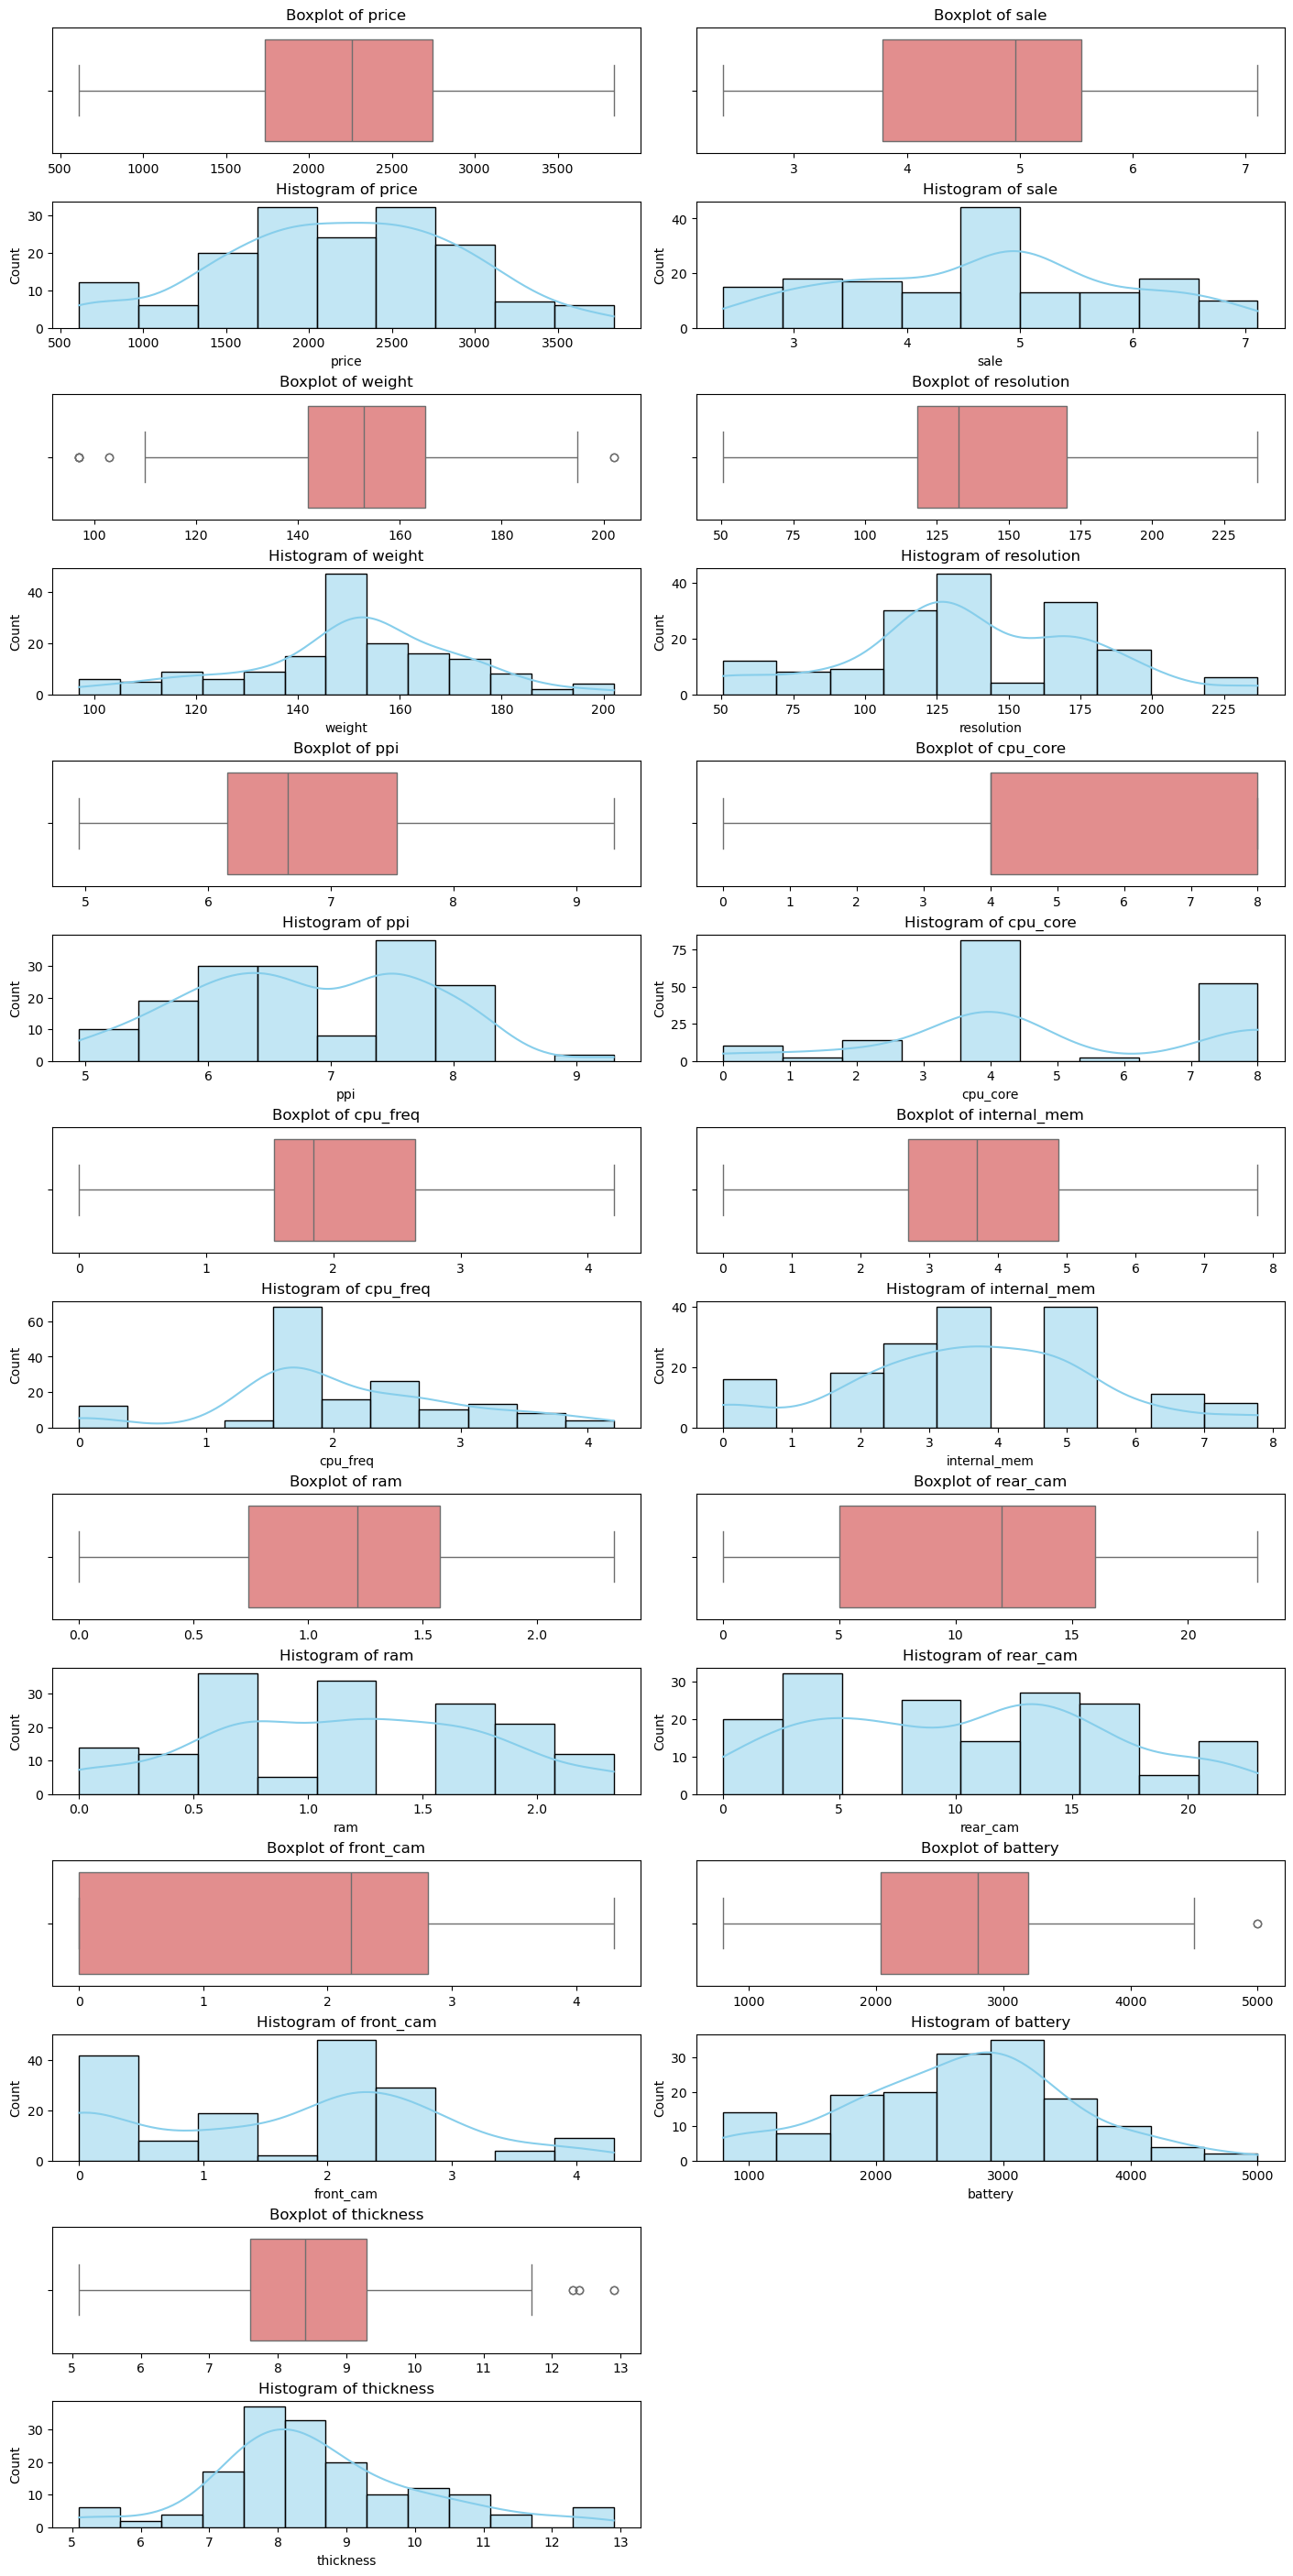

In [68]:
# verifying distribtion of data after handling skewness
def plot_box_and_hist(dataframe, n_cols=2, figsize_base=(14, 4)):
    """
    Generates boxplots and histograms for all numeric columns in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        n_cols (int, optional): Number of columns in the subplot grid. Defaults to 2.
        figsize_base (tuple, optional): Base figure size (width, height).
            The height of the figure will be scaled based on the number of rows.
            Defaults to (14, 4).
    """
    numeric_columns = dataframe.select_dtypes(include='number').columns
    n_vars = len(numeric_columns)
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows * 2, n_cols, figsize=(figsize_base[0], n_rows * figsize_base[1]), constrained_layout=True)

    for idx, col in enumerate(numeric_columns):
        row = (idx // n_cols) * 2
        col_pos = idx % n_cols

        sns.boxplot(x=dataframe[col], ax=axs[row][col_pos], color='lightcoral')
        axs[row][col_pos].set_title(f'Boxplot of {col}')
        axs[row][col_pos].set_xlabel('')

        sns.histplot(dataframe[col], kde=True, ax=axs[row + 1][col_pos], color='skyblue')
        axs[row + 1][col_pos].set_title(f'Histogram of {col}')
        axs[row + 1][col_pos].set_xlabel(col)

    # Hide any unused subplots
    total_plots = n_rows * n_cols
    for i in range(n_vars, total_plots):
        axs[(i // n_cols) * 2][i % n_cols].axis('off')
        axs[(i // n_cols) * 2 + 1][i % n_cols].axis('off')

    plt.show()


plot_box_and_hist(transformed_cellphone_df)

In [69]:
transformed_cellphone_df.skew()

price          -0.152156
sale           -0.007797
weight         -0.431938
resolution     -0.018198
ppi             0.013703
cpu_core       -0.009077
cpu_freq        0.014312
internal_mem   -0.007992
ram            -0.021790
rear_cam        0.106929
front_cam      -0.076752
battery        -0.030805
thickness       0.442941
dtype: float64

In [70]:
cellphone_data.skew()

price          -0.152156
sale            1.684085
weight         -0.431938
resolution     -0.801232
ppi             0.602503
cpu_core       -0.009077
cpu_freq       -0.512663
internal_mem    2.389683
ram             0.792698
rear_cam        0.106929
front_cam       1.169750
battery        -0.030805
thickness       0.442941
dtype: float64

In [71]:
transformed_cellphone_df.corr()

,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
price,1.000000,-0.021488,0.402046,0.478278,0.847822,0.677059,0.714286,0.880625,0.904180,0.769489,0.775204,0.694707,-0.562937
sale,-0.021488,1.000000,0.160168,0.148584,-0.056043,0.032171,-0.176355,-0.058291,-0.058679,-0.017973,0.018816,0.114472,0.020724
weight,0.402046,0.160168,1.000000,0.708175,0.355382,0.226193,0.300848,0.367388,0.435180,0.398793,0.335492,0.584795,0.066103
resolution,0.478278,0.148584,0.708175,1.000000,0.400819,0.400283,0.277447,0.446859,0.494841,0.546357,0.558278,0.493030,-0.382112
ppi,0.847822,-0.056043,0.355382,0.400819,1.000000,0.537676,0.753606,0.799796,0.819388,0.802322,0.656738,0.522476,-0.369393
cpu_core,0.677059,0.032171,0.226193,0.400283,0.537676,1.000000,0.444090,0.546325,0.577519,0.611353,0.653567,0.528766,-0.554084
cpu_freq,0.714286,-0.176355,0.300848,0.277447,0.753606,0.444090,1.000000,0.669935,0.703791,0.609762,0.458757,0.548737,-0.304538
internal_mem,0.880625,-0.058291,0.367388,0.446859,0.799796,0.546325,0.669935,1.000000,0.942991,0.667975,0.748422,0.667488,-0.481750
ram,0.904180,-0.058679,0.435180,0.494841,0.819388,0.577519,0.703791,0.942991,1.000000,0.721814,0.752302,0.710544,-0.475742
rear_cam,0.769489,-0.017973,0.398793,0.546357,0.802322,0.611353,0.609762,0.667975,0.721814,1.000000,0.709331,0.515948,-0.436203


In [72]:
cellphone_data_for_model = transformed_cellphone_df

cellphone_data_for_model.head()

,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,2357,2.373085,135.0,137.402398,7.512572,8,1.766973,3.698894,1.575662,13.00,2.809969,2610,7.4
1,1749,2.373085,125.0,50.582796,6.153449,2,1.688426,1.867646,0.738490,3.15,0.000000,1700,9.9
2,1916,2.373085,110.0,93.524315,6.782423,4,1.534070,2.696836,0.996628,13.00,2.186685,2000,7.6
3,1315,2.474417,118.5,50.582796,6.153449,2,1.688426,1.867646,0.429290,3.15,0.000000,1400,11.0
4,1749,2.474417,125.0,50.582796,6.153449,2,1.688426,1.867646,0.738490,3.15,0.000000,1700,9.9


<div style="background-color:#1e3a8a; color: white; padding: 10px; border-radius: 8px; font-size: 20px;font-weight: bold;">
  ✂️ <span style="color: #fbbf24;">4</span>| Spliting train & testing data
</div>

In [112]:

# Assuming 'price' is your target
X = cellphone_data.drop('price', axis=1)
y = cellphone_data['price']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)


In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 2: Calculate VIF on X_train (before scaling)

vif = pd.DataFrame()
vif['feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_no_const = vif[vif["feature"] != "const"]
print(vif_no_const)

         feature        VIF
1           sale   1.120837
2         weight   3.675442
3     resolution   3.844509
4            ppi   4.078950
5       cpu_core   3.135186
6       cpu_freq   2.813859
7   internal_mem   5.857996
8            ram  10.498994
9       rear_cam   4.244117
10     front_cam   2.473530
11       battery   3.429559
12     thickness   2.600588


## Feature scaling

In [604]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [606]:
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(pd.DataFrame(y_train))
y_test_scaled = scaler.transform(pd.DataFrame(y_test))


<div style="background-color:#1e3a8a; color: white; padding: 10px; border-radius: 8px; font-size: 20px;font-weight: bold;">
  🤖 <span style="color: #fbbf24;">5</span>| Building Models to predict Price 
</div>

In [608]:
# Building the models
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)
y_pred_train_lr = linear_model.predict(X_train_scaled)
y_pred_test_lr = linear_model.predict(X_test_scaled)

In [610]:
print("Accuracy Scores for Linear Regression model ")
lr_rmse_train = mean_squared_error(y_test_scaled, y_pred_test_lr)
lr_rmse_test = mean_squared_error(y_train_scaled, y_pred_train_lr)
lr_r2s_train = r2_score(y_train_scaled, y_pred_train_lr)
lr_r2s_test = r2_score(y_test_scaled, y_pred_test_lr)
print("Mean Squared Error :", lr_rmse_train)
print("Mean Squared Error :", lr_rmse_train)
print("R-squared Score (Train) :", lr_r2s_train)
print("R-squared Score (Test) :", lr_r2s_test)
print("**************" * 7)

Accuracy Scores for Linear Regression model 
Mean Squared Error : 0.11063023832859971
Mean Squared Error : 0.11063023832859971
R-squared Score (Train) : 0.9241865787955037
R-squared Score (Test) : 0.8253332755796008
**************************************************************************************************


In [612]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train_scaled)
y_pred_train_lar = lasso_model.predict(X_train_scaled)
y_pred_test_lar = lasso_model.predict(X_test_scaled)

print("Accuracy Scores for Lasso Regression (L1 Regularization) model ")
train_lar_rmse = mean_squared_error(y_train_scaled, y_pred_train_lar)
test_lar_rmse = mean_squared_error(y_test_scaled, y_pred_test_lar)
train_lar_r2s = r2_score(y_train_scaled, y_pred_train_lar)
test_lar_r2s = r2_score(y_test_scaled, y_pred_test_lar)
print("Mean Squared Error :", train_lar_rmse)
print("Mean Squared Error :", test_lar_rmse)
print("R-squared Score (Train) :", train_lar_r2s)
print("R-squared Score (Test) :", test_lar_r2s)
print("**************" * 7)

Accuracy Scores for Lasso Regression (L1 Regularization) model 
Mean Squared Error : 0.9999999999999998
Mean Squared Error : 0.6359003257627074
R-squared Score (Train) : 0.0
R-squared Score (Test) : -0.003980725675823749
**************************************************************************************************


In [614]:
# Ridge Regression (L2 Regularization)
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train_scaled)
y_pred_train_ridge = ridge_model.predict(X_train_scaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

print("Accuracy Scores for Ridge Regression (L2 Regularization) model")
train_ridge_rmse = mean_squared_error(y_train_scaled, y_pred_train_ridge)
test_ridge_rmse = mean_squared_error(y_test_scaled, y_pred_test_ridge)
train_ridge_r2s = r2_score(y_train_scaled, y_pred_train_ridge)
test_ridge_r2s = r2_score(y_test_scaled, y_pred_test_ridge)
print("Mean Squared Error :", train_ridge_rmse)
print("Mean Squared Error :", test_ridge_rmse)
print("R-squared Score (Train) :", train_ridge_r2s)
print("R-squared Score (Test) :", test_ridge_r2s)
print("**************" * 7)

Accuracy Scores for Ridge Regression (L2 Regularization) model
Mean Squared Error : 0.07584853153825348
Mean Squared Error : 0.11007685340209618
R-squared Score (Train) : 0.9241514684617465
R-squared Score (Test) : 0.8262069782301267
**************************************************************************************************


In [616]:
# Elastic Net Regression (L1 and L2 Regularizations)
enet_model = ElasticNet()
enet_model.fit(X_train_scaled, y_train_scaled)
y_pred_train_enet = enet_model.predict(X_train_scaled)
y_pred_test_enet = enet_model.predict(X_test_scaled)

print("Accuracy Scores for Elastic Net Regression (L1 and L2 Regularizations) model")
train_enet_rmse = mean_squared_error(y_train_scaled, y_pred_train_enet)
test_enet_rmse = mean_squared_error(y_test_scaled, y_pred_test_enet)
train_enet_r2s = r2_score(y_train_scaled, y_pred_train_enet)
test_enet_r2s = r2_score(y_test_scaled, y_pred_test_enet)
print("Mean Squared Error :", train_enet_rmse)
print("Mean Squared Error :", test_enet_rmse)
print("R-squared Score (Train) :", train_enet_r2s)
print("R-squared Score (Test) :", test_enet_r2s)
print("**************" * 7)

Accuracy Scores for Elastic Net Regression (L1 and L2 Regularizations) model
Mean Squared Error : 0.5146251488593081
Mean Squared Error : 0.3324726287970767
R-squared Score (Train) : 0.4853748511406918
R-squared Score (Test) : 0.4750810817297848
**************************************************************************************************


In [618]:
# Decission Tree regression - Choosing max depth as 6 after trying different values
dtree = DecisionTreeRegressor(max_depth = 6)
dtree.fit(X_train_scaled, y_train_scaled)
y_pred_train_dtree = dtree.predict(X_train_scaled)
y_pred_test_dtree = dtree.predict(X_test_scaled)

In [620]:
print("Accuracy Scores for Decision Tree model ")
train_dtree_rmse = mean_squared_error(y_train_scaled, y_pred_train_dtree)
test_dtree_rmse = mean_squared_error(y_test_scaled, y_pred_test_dtree)
train_dtree_r2s = r2_score(y_train_scaled, y_pred_train_dtree)
test_dtree_r2s = r2_score(y_test_scaled, y_pred_test_dtree)
print("Mean Squared Error :", train_dtree_rmse)
print("Mean Squared Error :", test_dtree_rmse)
print("R-squared Score (Train) :", train_dtree_r2s)
print("R-squared Score (Test) :", test_dtree_r2s)
print("**************" * 7)

Accuracy Scores for Decision Tree model 
Mean Squared Error : 0.009054245703738384
Mean Squared Error : 0.02788430874161831
R-squared Score (Train) : 0.9909457542962616
R-squared Score (Test) : 0.9559753197298638
**************************************************************************************************


In [622]:
# Random Forest regression - Choosing max depth as 6 after trying different values
# Choosing the parameters after trying different values
rf_raw = RandomForestRegressor(n_estimators = 500, random_state = 1, max_depth = 6)
rf_raw.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_train_rf = rf_raw.predict(X_train_scaled)
y_pred_test_rf = rf_raw.predict(X_test_scaled)

In [624]:
print("Accuracy Scores for Random Forest model ")
train_rf_rmse = mean_squared_error(y_train_scaled, y_pred_train_rf)
test_rf_rmse = mean_squared_error(y_test_scaled, y_pred_test_rf)
train_rf_r2s = r2_score(y_train_scaled, y_pred_train_rf)
test_rf_r2s = r2_score(y_test_scaled, y_pred_test_rf)
print("Mean Squared Error :", train_rf_rmse)
print("Mean Squared Error :", test_rf_rmse)
print("R-squared Score (Train) :", train_rf_r2s)
print("R-squared Score (Test) :", test_rf_r2s)
print("**************" * 7)

Accuracy Scores for Random Forest model 
Mean Squared Error : 0.01073685709382101
Mean Squared Error : 0.03746086941431525
R-squared Score (Train) : 0.989263142906179
R-squared Score (Test) : 0.9408555250951923
**************************************************************************************************


In [626]:
# Gradient Boosting Regression model
gb_raw = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 42)
gb_raw.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_train_gb = gb_raw.predict(X_train_scaled)
y_pred_test_gb = gb_raw.predict(X_test_scaled)

In [628]:
print("Accuracy Scores for Gradient Boost Regressor model on raw data")
train_gb_rmse = mean_squared_error(y_train_scaled, y_pred_train_gb)
test_gb_rmse = mean_squared_error(y_test_scaled, y_pred_test_gb)
train_gb_r2s = r2_score(y_train_scaled, y_pred_train_gb)
test_gb_r2s = r2_score(y_test_scaled, y_pred_test_gb)
print("Mean Squared Error :", train_gb_rmse)
print("Mean Squared Error :", test_gb_rmse)
print("R-squared Score (Train) :", train_gb_r2s)
print("R-squared Score (Test) :", test_gb_r2s)
print("**************" * 7)

Accuracy Scores for Gradient Boost Regressor model on raw data
Mean Squared Error : 0.001481002054069065
Mean Squared Error : 0.018915493713355366
R-squared Score (Train) : 0.9985189979459309
R-squared Score (Test) : 0.9701355851924227
**************************************************************************************************


In [630]:
# XGBoost Regression model - Max depth = 2 after testing various values
xgb_raw = xgb.XGBRegressor(random_state = 111, max_depth = 2)
xgb_raw.fit(X_train_scaled, y_train_scaled)
y_pred_train_xgb = xgb_raw.predict(X_train_scaled)
y_pred_test_xgb = xgb_raw.predict(X_test_scaled)

In [632]:
print("Accuracy Scores for XGBoost model on raw data")
train_xgb_rmse = mean_squared_error(y_train_scaled, y_pred_train_xgb)
test_xgb_rmse = mean_squared_error(y_test_scaled, y_pred_test_xgb)
train_xgb_r2s = r2_score(y_train_scaled, y_pred_train_xgb)
test_xgb_r2s = r2_score(y_test_scaled, y_pred_test_xgb)
print("Mean Squared Error :", train_xgb_rmse)
print("Mean Squared Error :", test_xgb_rmse)
print("R-squared Score (Train) :", train_xgb_r2s)
print("R-squared Score (Test) :", test_xgb_r2s)
print("**************" * 7)

Accuracy Scores for XGBoost model on raw data
Mean Squared Error : 0.0011413701775947673
Mean Squared Error : 0.018419738439799445
R-squared Score (Train) : 0.9988586298224053
R-squared Score (Test) : 0.9709183002173055
**************************************************************************************************


<div style="background-color:#1e3a8a; color: white; padding: 10px; border-radius: 8px; font-size: 20px;font-weight: bold;">
  🤖 <span style="color: #fbbf24;">5</span>| Building Models to predict Price without scaling Price
</div>

In [309]:
# Building the models
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_train_lr = linear_model.predict(X_train_scaled)
y_pred_test_lr = linear_model.predict(X_test_scaled)

In [310]:
print("Accuracy Scores for Linear Regression model on raw data")
lr_rmse_train = mean_squared_error(y_test, y_pred_test_lr)
lr_rmse_test = mean_squared_error(y_train, y_pred_train_lr)
lr_r2s_train = r2_score(y_train, y_pred_train_lr)
lr_r2s_test = r2_score(y_test, y_pred_test_lr)
print("Mean Squared Error :", lr_rmse_train)
print("Mean Squared Error :", lr_rmse_train)
print("R-squared Score (Train) :", lr_r2s_train)
print("R-squared Score (Test) :", lr_r2s_test)
print("**************" * 7)

Accuracy Scores for Linear Regression model on raw data
Mean Squared Error : 64468.242353175316
Mean Squared Error : 64468.242353175316
R-squared Score (Train) : 0.9241865787955036
R-squared Score (Test) : 0.8253332755796008
**************************************************************************************************


In [311]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred_train_lar = lasso_model.predict(X_train_scaled)
y_pred_test_lar = lasso_model.predict(X_test_scaled)

print("Accuracy Scores for Lasso Regression (L1 Regularization) model on raw data")
train_lar_rmse = mean_squared_error(y_train, y_pred_train_lar)
test_lar_rmse = mean_squared_error(y_test, y_pred_test_lar)
train_lar_r2s = r2_score(y_train, y_pred_train_lar)
test_lar_r2s = r2_score(y_test, y_pred_test_lar)
print("Mean Squared Error :", train_lar_rmse)
print("Mean Squared Error :", test_lar_rmse)
print("R-squared Score (Train) :", train_lar_r2s)
print("R-squared Score (Test) :", test_lar_r2s)
print("**************" * 7)

Accuracy Scores for Lasso Regression (L1 Regularization) model on raw data
Mean Squared Error : 44201.212888636386
Mean Squared Error : 64121.265209394325
R-squared Score (Train) : 0.9241488438680512
R-squared Score (Test) : 0.826273356446409
**************************************************************************************************


In [312]:
# Ridge Regression (L2 Regularization)
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred_train_ridge = ridge_model.predict(X_train_scaled)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

print("Accuracy Scores for Ridge Regression (L2 Regularization) model on raw data")
train_ridge_rmse = mean_squared_error(y_train, y_pred_train_lar)
test_ridge_rmse = mean_squared_error(y_test, y_pred_test_lar)
train_ridge_r2s = r2_score(y_train, y_pred_train_lar)
test_ridge_r2s = r2_score(y_test, y_pred_test_lar)
print("Mean Squared Error :", train_ridge_rmse)
print("Mean Squared Error :", test_ridge_rmse)
print("R-squared Score (Train) :", train_ridge_r2s)
print("R-squared Score (Test) :", test_ridge_r2s)
print("**************" * 7)

Accuracy Scores for Ridge Regression (L2 Regularization) model on raw data
Mean Squared Error : 44201.212888636386
Mean Squared Error : 64121.265209394325
R-squared Score (Train) : 0.9241488438680512
R-squared Score (Test) : 0.826273356446409
**************************************************************************************************


In [313]:
# Elastic Net Regression (L1 and L2 Regularizations)
enet_model = ElasticNet()
enet_model.fit(X_train_scaled, y_train)
y_pred_train_enet = enet_model.predict(X_train_scaled)
y_pred_val_enet = enet_model.predict(X_test_scaled)

print("Accuracy Scores for Elastic Net Regression (L1 and L2 Regularizations) model on raw data")
train_enet_rmse = mean_squared_error(y_train, y_pred_train_lar)
test_enet_rmse = mean_squared_error(y_test, y_pred_test_lar)
train_enet_r2s = r2_score(y_train, y_pred_train_lar)
test_enet_r2s = r2_score(y_test, y_pred_test_lar)
print("Mean Squared Error :", train_enet_rmse)
print("Mean Squared Error :", test_enet_rmse)
print("R-squared Score (Train) :", train_enet_r2s)
print("R-squared Score (Test) :", test_enet_r2s)
print("**************" * 7)

Accuracy Scores for Elastic Net Regression (L1 and L2 Regularizations) model on raw data
Mean Squared Error : 44201.212888636386
Mean Squared Error : 64121.265209394325
R-squared Score (Train) : 0.9241488438680512
R-squared Score (Test) : 0.826273356446409
**************************************************************************************************
